# What is the most optimal skill to learn for Data Analysts?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\mmarc\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filter DataFrame to include only Data Analysts located in Poland
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

# Drop NaN values from the 'salary_year_avg' column
df_DA_PL = df_DA_PL.dropna(subset=['salary_year_avg'])

# Expand the 'job_skills' list column so each skill gets its own row
df_DA_PL_exploded = df_DA_PL.explode('job_skills')

In [3]:
# Group by each skill and calculate how many times it appears and the median salary
df_DA_skills = df_DA_PL_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Rename columns for clarity
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'}) 

# Total number of Data Analyst job postings
DA_job_count = len(df_DA_PL)

# Calculate percentage of jobs that require each skill
df_DA_skills['skill_perc'] = df_DA_skills['skill_count'] / DA_job_count * 100

# Define threshold for high-demand skills (more than 5% of job postings)
skill_percent = 5

# Filter skills that are in high demand
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_perc'] > skill_percent]



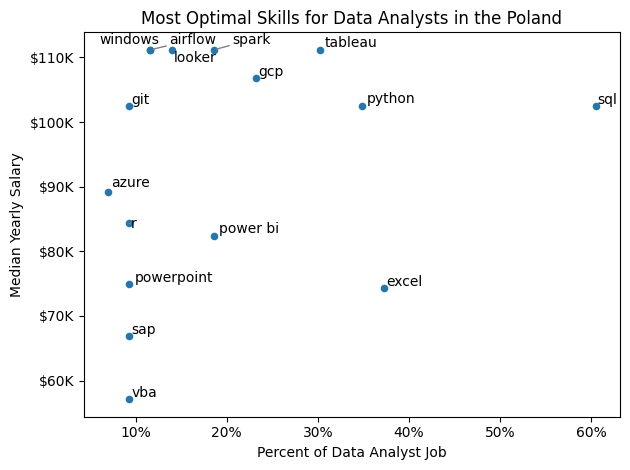

In [4]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Create a scatter plot of high-demand Data Analyst skills showing skill percentage vs. median salary
df_DA_skills_high_demand.plot(kind='scatter', x='skill_perc', y='median_salary')

# Add skill names as text labels to each point
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_perc'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Automatically adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Add axis labels and title
plt.xlabel('Percent of Data Analyst Job')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in the Poland')

# Format y-axis to show salaries in "K", x-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Optimize layout and show the plot
plt.tight_layout()
plt.show()

In [5]:
df_technology = df['job_type_skills'].copy()  # Copy the 'job_type_skills' column

df_technology = df_technology.drop_duplicates()  # Remove duplicate entries

df_technology = df_technology.dropna()  # Remove rows with missing (NaN) values

technology_dict = {}  # Initialize an empty dictionary to store merged skills by job type

for row in df_technology:
    row_dict = ast.literal_eval(row)  # Convert string representation of dict to actual dictionary
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value  # Merge lists for the same job type
        else:
            technology_dict[key] = value  # Add new job type with its skill list

# Remove duplicate skills from each job type's list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict  # Display the final dictionary of job types and their unique skill sets


{'analyst_tools': ['nuix',
  'excel',
  'msaccess',
  'sheets',
  'ssis',
  'tableau',
  'qlik',
  'spss',
  'splunk',
  'looker',
  'word',
  'alteryx',
  'esquisse',
  'outlook',
  'microstrategy',
  'ms access',
  'powerpoint',
  'spreadsheet',
  'sharepoint',
  'visio',
  'datarobot',
  'powerbi',
  'sas',
  'ssrs',
  'power bi',
  'dax',
  'cognos',
  'sap'],
 'programming': ['rust',
  'cobol',
  'lua',
  'mongodb',
  'ocaml',
  'lisp',
  'vba',
  'r',
  'nosql',
  'shell',
  'golang',
  'solidity',
  'swift',
  'f#',
  'apl',
  'assembly',
  'ruby',
  'elixir',
  'objective-c',
  'matlab',
  'sql',
  'powershell',
  'crystal',
  'perl',
  'typescript',
  'dart',
  'clojure',
  'haskell',
  'c++',
  'groovy',
  'sass',
  'java',
  'erlang',
  'vb.net',
  'python',
  'delphi',
  'pascal',
  'scala',
  'bash',
  't-sql',
  'sas',
  'visual basic',
  'javascript',
  'c',
  'css',
  'visualbasic',
  'c#',
  'html',
  'julia',
  'php',
  'fortran',
  'no-sql',
  'go',
  'kotlin',
  'mo

In [6]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology


,technology,skills
0,analyst_tools,nuix
0,analyst_tools,excel
0,analyst_tools,msaccess
0,analyst_tools,sheets
0,analyst_tools,ssis
...,...,...
9,sync,slack
9,sync,zoom
9,sync,ringcentral
9,sync,microsoft teams


In [7]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_perc,technology,skills
0,26,102500.00,60.465116,programming,sql
1,16,74250.00,37.209302,analyst_tools,excel
2,15,102500.00,34.883721,programming,python
3,13,111175.00,30.232558,analyst_tools,tableau
4,10,106837.50,23.255814,cloud,gcp
5,8,82350.00,18.604651,analyst_tools,power bi
6,8,111175.00,18.604651,libraries,spark
7,6,111175.00,13.953488,analyst_tools,looker
8,5,111175.00,11.627907,libraries,airflow
9,5,111175.00,11.627907,os,windows


In [8]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_perc'] > skill_percent]

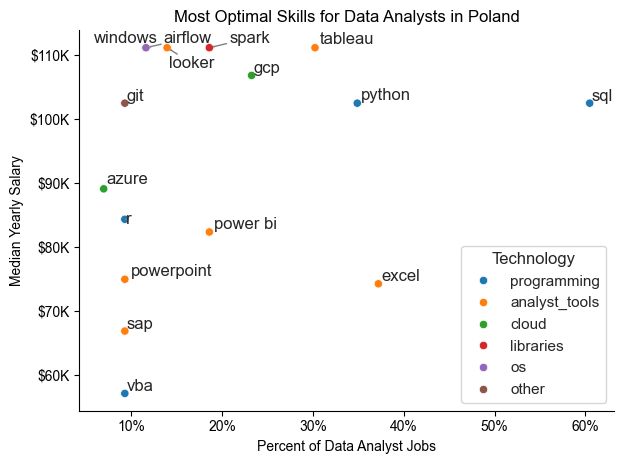

In [9]:
# Create a scatter plot of high-demand Data Analyst skills colored by technology category showing skill percentage vs. median salary
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_perc',
    y='median_salary',
    hue='technology'
)

sns.despine()  # Remove top and right borders
sns.set_theme(style='ticks')  # Set plot style

# Add skill labels to each point
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_perc'].iloc[i], 
                          df_DA_skills_high_demand['median_salary'].iloc[i], 
                          txt))

# Adjust labels to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Add axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Poland')
plt.legend(title='Technology')

# Format y-axis to show salaries in "K", x-axis as percentage
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Optimize layout and show the plot
plt.tight_layout()
plt.show()
